In [21]:
import numpy as np
import scipy as scp
from scipy import io
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import pdb
from numpy.core.umath_tests import matrix_multiply as mm


%matplotlib inline 
%pylab inline
pylab.rcParams['figure.figsize'] = (16.0, 8.0)

Populating the interactive namespace from numpy and matplotlib


In [22]:
"""JUST HINTS"""
"""
# compute the likelihood of a multivariate Gaussian
scipy.stats.multivariate_normal.pdf
 
# scatters a set of points; check out the "c" keyword argument to change color, and the "s" arg to change the size
plt.scatter
plt.xlim # sets the range of values for the x axis
plt.ylim # sets the range of values for the y axis
 
# to check the shape of a vector, use the .shape member
foo = np.random.randn( 100, 200 )
foo.shape # an array with values (100,200)
 
# to transpose a vector, you can use the .T operator
foo = np.atleast_2d( [42, 43] ) # this is a row vector
foo.T # this is a column vector
 
import numpy as np
np.atleast_2d
np.sum
"""
pass

# Load Data

In [23]:
old_faithful_data = scp.io.loadmat('lib/old_faithful.mat')
old_faithful_data = old_faithful_data['data']

In [26]:
old_faithful_data[:10,:]


array([[  3.6  ,  79.   ],
       [  1.8  ,  54.   ],
       [  3.333,  74.   ],
       [  2.283,  62.   ],
       [  4.533,  85.   ],
       [  2.883,  55.   ],
       [  4.7  ,  88.   ],
       [  3.6  ,  85.   ],
       [  1.95 ,  51.   ],
       [  4.35 ,  85.   ]])

# Clean and Mean Center the Data

In [5]:
#standardize data
x_mean = np.mean(old_faithful_data[:,[0]])
y_mean = np.mean(old_faithful_data[:,[1]])
x_std = np.std(old_faithful_data[:,[0]])
y_std = np.std(old_faithful_data[:,[1]])

def standardize_x_data(x):
    return (x - x_mean) / x_std

def standardize_y_data(y):
    return (y - y_mean) / y_std

standardize_x_data = np.vectorize(standardize_x_data)
standardize_y_data = np.vectorize(standardize_y_data)


old_faithful_data[:,[0]] = standardize_x_data(old_faithful_data[:,[0]])
old_faithful_data[:,[1]] = standardize_y_data(old_faithful_data[:,[1]])


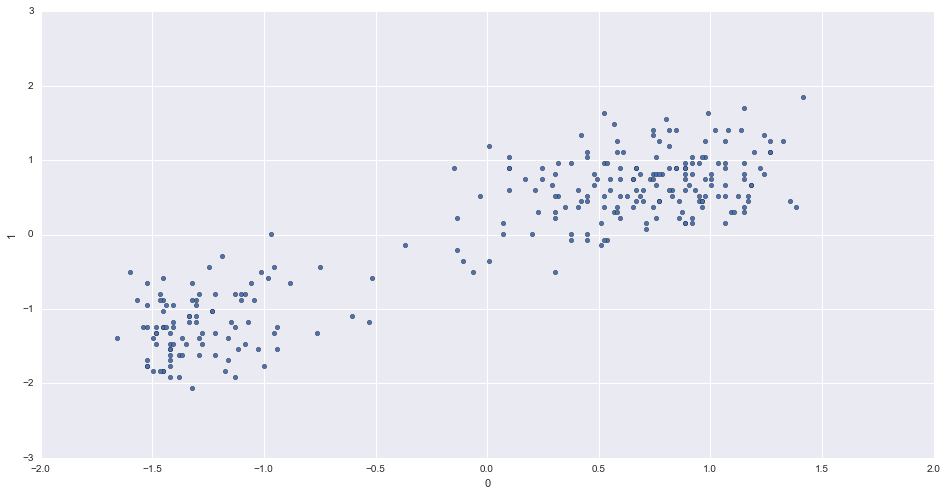

In [6]:
tmp_df = pd.DataFrame(old_faithful_data)
tmp_df.plot(kind='scatter', x=0, y=1)

# EM Class

[ 0.09849886  0.59712344]
0.385875526441
[ 0.09849886  0.59712344]
0.45955610214
[ 0.09849886  0.59712344]
0.532103079199
[ 0.09849886  0.59712344]
0.548609017025
[ 0.09849886  0.59712344]
0.509736802287
[ 0.09849886  0.59712344]
0.407554019923
[ 0.09849886  0.59712344]
0.219061850729
[ 0.09849886  0.59712344]
0.0396702263872
[ 0.09849886  0.59712344]
0.00114189191003
[ 0.09849886  0.59712344]
8.4567348698e-06
[ 0.09849886  0.59712344]
2.87012392844e-08
[ 0.09849886  0.59712344]
3.88515193854e-09
[ 0.09849886  0.59712344]
2.8293715836e-09
[ 0.09849886  0.59712344]
2.64615612107e-09
[ 0.09849886  0.59712344]
2.60481334489e-09
[ 0.09849886  0.59712344]
2.59500472318e-09
[ 0.09849886  0.59712344]
2.59265136427e-09
[ 0.09849886  0.59712344]
2.5920852296e-09
[ 0.09849886  0.59712344]
2.59194895111e-09
[ 0.09849886  0.59712344]
2.59191614149e-09
[ 0.09849886  0.59712344]
2.59190824214e-09
[ 0.09849886  0.59712344]
2.59190634026e-09
[ 0.09849886  0.59712344]
2.59190588235e-09
[ 0.09849886  0.

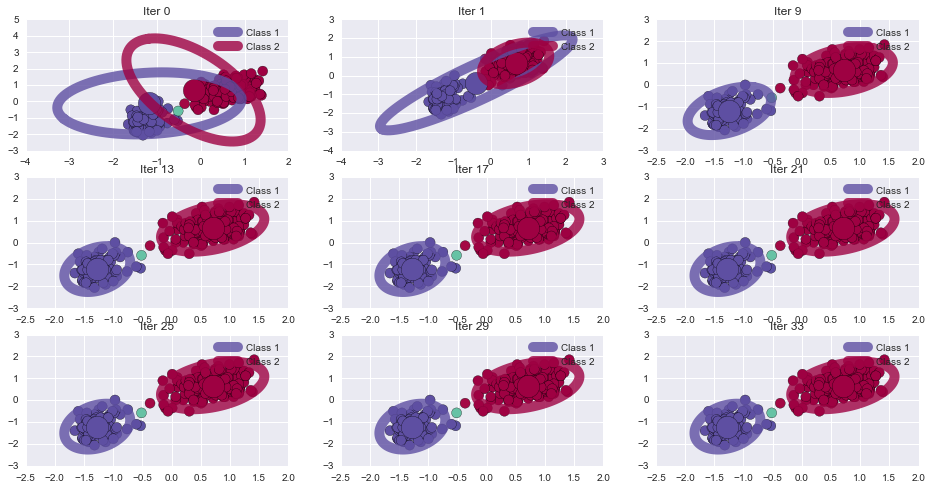

In [19]:
class Two_Class_EM():
    def __init__(self, data):
        self.data = data
        self.N = len(data)  #  TODO:  might not be correct
        self.num_of_iterations_to_run = 40
        
        self.responsibilities = np.zeros((len(data)))  # ri1 responsibilities for cluster 1, cluster 2 is 1.0 - ri
#         self.responsibilities = np.array([0.5 for x in range(len(self.data))])  # ri1 responsibilities for cluster 1, cluster 2 is 1.0 - ri

        
        # the Gaussian means (as column vectors -- ie, the mean for Gaussian 0 is mus[:,0]
        self.cluster_means_u = np.asarray( [[-1.17288986, -0.11642103],
                           [-0.16526981,  0.70142713]])

        # the Gaussian covariance matrices
        self.cluster_covs_sigma = list()
        self.cluster_covs_sigma.append( 
            np.asarray([[ 0.74072815,  0.09252716],
                        [ 0.09252716,  0.5966275 ]]) )
        self.cluster_covs_sigma.append( 
            np.asarray([[ 0.39312776, -0.46488887],
                        [-0.46488887,  1.64990767]]) )

        # The Gaussian mixing weights
        self.cluster_mixing_weights_alpha = [ 0.68618439, 0.31381561 ]  # called alpha in the slides(
        
        
        
        
        
        
    def fit(self):
#         pdb.set_trace()
        iterations_to_print = [0,1,9,13,17,21,25,29,33]
        fig, axes = plt.subplots(3,3)
        axes = axes.flatten()
        next_ax_index = 0
        
        for i in range(self.num_of_iterations_to_run):
            if i in iterations_to_print:
                self.plot_em_interation(axes[next_ax_index], i)
                next_ax_index += 1
            self.update_responsibilities()
            self.update_mixing_weights()
            self.update_means()
            self.update_covariances()

    
    def update_responsibilities(self):
        
        for i, point in enumerate(self.data):
            prob_in_k1 = stats.multivariate_normal.pdf(point, self.cluster_means_u[0], self.cluster_covs_sigma[0]) 
            prob_in_k2 = stats.multivariate_normal.pdf(point, self.cluster_means_u[1], self.cluster_covs_sigma[1]) 
                        
            self.responsibilities[i] = prob_in_k1 * self.cluster_mixing_weights_alpha[0] \
             / (prob_in_k1 * self.cluster_mixing_weights_alpha[0] + prob_in_k2 * self.cluster_mixing_weights_alpha[1])
                
            if i == 0:
                print(point)
                print(self.responsibilities[i])
            
        
    def update_mixing_weights(self):
        self.rk1 = np.sum(self.responsibilities)  #  this only sums over the first cluster, r_k=1
        self.cluster_mixing_weights_alpha[0] = self.rk1 / self.N
        self.cluster_mixing_weights_alpha[1] = 1.0 - self.cluster_mixing_weights_alpha[0]
    
    def update_means(self):
#         pdb.set_trace()
        cluster_1_means = np.dot(np.atleast_2d(self.responsibilities), self.data)[0] / self.rk1
        cluster_2_means = np.dot((1.0 - np.atleast_2d(self.responsibilities)), self.data)[0] / (self.N - self.rk1)  #  self.N is the maximum responsibility, N - rk1 = rk2
        self.cluster_means_u = np.atleast_2d([cluster_1_means, cluster_2_means])
    
    def update_covariances(self):
        #  for cluster 1
        summation_total = np.zeros((2,2))
        for i, point in enumerate(self.data):            
            dif_x_u = np.atleast_2d(point - self.cluster_means_u[0])
            tmp = np.atleast_2d(dif_x_u.T * dif_x_u)
            resp = np.atleast_2d(self.responsibilities[i]) * tmp
            summation_total += resp
        summation_total /= self.rk1
        self.cluster_covs_sigma[0] = summation_total
        
        #  for cluster 2
        summation_total_k2 = np.zeros((2,2))
        for i, point in enumerate(self.data):            
            dif_x_u = np.atleast_2d(point - self.cluster_means_u[1])
            tmp = np.atleast_2d(dif_x_u.T * dif_x_u)
            resp = np.atleast_2d(1.0 - self.responsibilities[i]) * tmp
            summation_total_k2 += resp
        summation_total_k2 /= (self.N - self.rk1)
        self.cluster_covs_sigma[1] = summation_total_k2

        
        
#         #  for cluster 2
#         summation_total_k2 = np.zeros((2,2))
#         for i, point in enumerate(self.data):
#             dif_x_u = np.atleast_2d(point - self.cluster_means_u[1])
#             tmp = np.dot(dif_x_u.T, dif_x_u)
            
#             resp = (1.0 - self.responsibilities[i]) * tmp
#             summation_total_k2 += resp
            
#         summation_total_k2 /= (self.N - self.rk1)
#         self.cluster_covs_sigma[1] = summation_total_k2
        
#         pdb.set_trace()
#         dif_x_u = self.data - np.atleast_2d(self.cluster_means_u[0])
#         dot_prod = np.dot(dif_x_u.T, dif_x_u)
#         combined_3d_matrix = np.zeros((len(self.responsibilities), 2, 2))
#         for i, weight in enumerate(self.responsibilities):
#             combined_3d_matrix[i] = weight * dot_prod
#         self.cluster_covs_sigma[0] = np.sum(combined_3d_matrix, axis=0) / self.rk1
        
#         dif_x_u = self.data - np.atleast_2d(self.cluster_means_u[1])
#         dot_prod = np.dot(dif_x_u.T, dif_x_u)
#         combined_3d_matrix = np.zeros((len(self.responsibilities), 2, 2))
#         for i, weight in enumerate((1.0 - self.responsibilities)):
#             combined_3d_matrix[i] = weight * dot_prod
#         self.cluster_covs_sigma[1] = np.sum(combined_3d_matrix, axis=0) / (self.N - self.rk1)
    

    
    
    def plot_em_interation(self, axe, iteration_num):
#         print(self.cluster_covs_sigma[0])
#         print(self.cluster_covs_sigma[1])

        axe.scatter(x=self.data[:,[0]], y=self.data[:,[1]], c=self.responsibilities, s=100, cmap=plt.cm.Spectral, vmin=0, vmax=1)
        axe.scatter(x=self.cluster_means_u[0][0], y=self.cluster_means_u[0][1], c=1.0, s=500, cmap=plt.cm.Spectral, vmin=0, vmax=1)
        axe.scatter(x=self.cluster_means_u[1][0], y=self.cluster_means_u[1][1], c=0.0, s=500, cmap=plt.cm.Spectral, vmin=0, vmax=1)
        cmap = plt.get_cmap('Spectral')
        points_to_plot_k1 = self.cov_to_pts(self.cluster_covs_sigma[0])
        axe.plot(points_to_plot_k1[0] + self.cluster_means_u[0][0], points_to_plot_k1[1] + self.cluster_means_u[0][1], c=cmap(1.0), linewidth=10, alpha=0.80)
        points_to_plot_k2 = self.cov_to_pts(self.cluster_covs_sigma[1])
        axe.plot(points_to_plot_k2[0] + self.cluster_means_u[1][0], points_to_plot_k2[1] + self.cluster_means_u[1][1], c=cmap(0.0), linewidth=10, alpha=0.80)
        axe.legend(['Class 1', 'Class 2'])
        axe.set_title("Iter " + str(iteration_num))

        
    def cov_to_pts(self, cov):
        circ = np.linspace( 0, 2*np.pi, 100 )
        sf = np.asarray( [ np.cos( circ ), np.sin( circ ) ] )
        [u,s,v] = np.linalg.svd( cov )
        pmat = u*2.447*np.sqrt(s) # 95% confidence
        return np.dot(  pmat, sf )
    
test_em = Two_Class_EM(old_faithful_data)
test_em.fit()